In [321]:
#-*-coding:utf-8 -*-

import csv
with open('analyzerData/preprocess/p36.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, dialect='excel')
    # 读要转换的txt文件，文件每行各词间以:字符分隔
    with open('analyzerData/p36-1/2019_08_18-17_53_26/carData_track1.txt', 'r') as filein:
        for line in filein:
            line_list = line.strip('\n').split(':')
            spamwriter.writerow(line_list)

In [332]:
%matplotlib inline
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

userinfo = "analyzerData/preprocess/p36.csv"

In [333]:
import csv

csv_file = csv.DictReader(open(userinfo, 'r'))
jsonData = []
for row in csv_file:
    jsonData.append({
        'Time(ms)': row["Time(ms)"],
        'Position_x': row["Position_x"],
        'Position_y': row["Position_y"],
        'Position_z': row["Position_z"],
        'Rotation_x': row["Rotation_x"],
        'Rotation_y': row["Rotation_y"],
        'Rotation_z': row["Rotation_z"],
        'Rotation_w': row["Rotation_w"],
        ' Speed (km/h) ': row[" Speed (km/h) "],
        'Steering Wheel Position_-1': row["Steering Wheel Position_-1"],
        'Steering Wheel Position_1': row["Steering Wheel Position_1"],
        ' Gas Pedal Position ': row[" Gas Pedal Position "],
        ' Brake Pedal Position ': row[" Brake Pedal Position "],
        ' Engine Running ': row[" Engine Running "],
        ' Distance Ahead (meters)': row[" Distance Ahead (meters)"],
        ' Time To Collision (sec) ': row[" Time To Collision (sec) "],
        ' Headway Time (sec)': row[" Headway Time (sec)"]
    })
tempDataset = pd.json_normalize(jsonData)
#a=np.min(tempDataset['Time(ms)'])
#tempDataset['Time(ms)']=int(tempDataset['Time(ms)'])-int(a)

In [334]:
tempDataset['Time(ms)'] = tempDataset['Time(ms)'].apply(lambda x: float(x))

minTime=np.min(tempDataset['Time(ms)'])
print(minTime)

1566122047579.0


In [335]:
def baseTime(x):
    x=int(x)-int(minTime)+1
    return x


tempDataset['Time(ms)'] = tempDataset['Time(ms)'].map( lambda x: baseTime(x))
tempDataset['Rotation_x'] = tempDataset['Rotation_x'].apply(lambda x: float(x))
tempDataset['Rotation_w'] = tempDataset['Rotation_w'].apply(lambda x: float(x))
tempDataset['Rotation_z'] = tempDataset['Rotation_z'].apply(lambda x: float(x))
tempDataset['Steering Wheel Position_-1'] = tempDataset['Steering Wheel Position_-1'].apply(lambda x: float(x))

tempDataset

,Time(ms),Position_x,Position_y,Position_z,Rotation_x,Rotation_y,Rotation_z,Rotation_w,Speed (km/h),Steering Wheel Position_-1,Steering Wheel Position_1,Gas Pedal Position,Brake Pedal Position,Engine Running,Distance Ahead (meters),Time To Collision (sec),Headway Time (sec)
0,1,-10.5,0.035,-230,-0.0015,1,-0.0014,0.0000,5.25,0.00000,0,0,TRUE,0,0,0,0.21523242
1,165,-10.5,0.101,-230,-0.0015,1,-0.0018,0.0000,5.74,0.00000,0,0,TRUE,0,0,0,0
2,313,-10.5,0.155,-230,-0.0010,1,-0.0016,0.0000,4.32,0.00000,0,0,TRUE,0,0,0,0
3,462,-10.5,0.194,-230,-0.0005,1,-0.0014,0.0000,2.91,0.00000,0,0,TRUE,0,0,0,0
4,585,-10.5,0.216,-230,0.0000,1,-0.0012,0.0000,1.5,0.00000,0,0,TRUE,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,480196,1082.772,0.136,1321.932,0.0012,0.9458,-0.0008,-0.3246,29.62,-0.22133,0,0,TRUE,0,0,0,-0.14791884
4025,480308,1082.945,0.136,1322.211,0.0012,0.9503,-0.0008,-0.3114,29.5,-0.22133,0,0,TRUE,0,0,0,-0.1568028
4026,480418,1083.11,0.136,1322.493,0.0012,0.9545,-0.0008,-0.2982,29.38,-0.22133,0,0,TRUE,0,0,0,-0.15306923
4027,480530,1083.267,0.136,1322.779,0.0012,0.9585,-0.0008,-0.2849,29.27,-0.22133,0,0,TRUE,0,0,0,-0.13126658


In [336]:
tempDataset.to_csv('analyzerData/preprocess/update_p36.csv',index=False)

In [337]:
# def msTos(x):
#     x=int(x)/1000
#     return x
    
# tempDataset['Time(s)'] = tempDataset['Time(ms)'].map( lambda x: msTos(x))

# tempDataset['Time(ms)']=tempDataset['Time(s)']

# dataset=tempDataset.drop(['Time(s)'],axis=1)
# dataset.rename(columns={'Time(ms)':'Time(s)'})

# dataset

Text(0, 0.5, 'Speed (km/h)')

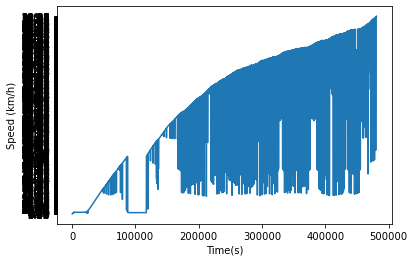

In [338]:
plt.figure()
plt.plot(tempDataset['Time(ms)'],tempDataset[' Speed (km/h) '])
plt.xlabel("Time(ms)")
plt.ylabel("Speed (km/h)")

In [170]:
document=tc.SFrame(tempDataset)
document.show()

Materializing SFrame